In [1]:
# import modules
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
data = pd.read_csv('../feature_extraction/data.csv')
data = data.set_index('image_id')
data.head()

,age_approximate,sex,melanoma,seborrheic_keratosis,red_mode,green_mode,blue_mode,red_median,green_median,blue_median,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
image_id,,,,,,,,,,,,,,,,,,,,,
ISIC_0000000,55,female,0.0,0.0,65,51,57,94,79,84,...,5.098648,0.109615,2.625431,0.508180,11.428232,10.780367,0.012018,0.329654,0.006513,0.046969
ISIC_0000001,30,female,0.0,0.0,87,53,46,116,72,55,...,4.441031,0.140831,2.777913,0.575211,2.318644,4.577623,0.021560,0.808480,0.006020,0.124740
ISIC_0000002,60,female,1.0,0.0,162,120,114,161,131,131,...,2.709728,0.168455,1.932127,0.540123,2.526498,0.231924,0.547760,0.007574,0.000012,0.941026
ISIC_0000003,30,male,0.0,0.0,182,128,51,161,110,71,...,2.581140,0.216727,2.214528,0.542617,2.665591,3.318969,0.040507,0.119264,0.000637,0.080628
ISIC_0000004,80,male,1.0,0.0,192,132,171,192,128,157,...,18.402358,0.129868,4.275156,0.564438,2.312946,0.506435,0.043551,3.153283,0.021736,2.213424


In [3]:
# Create a column with a "Neither" target
data.insert(4, "neither", 0.0)

In [4]:
# For loop to classify the images as "Neither" if they are not melanoma or seborrheic keratosis
for index, row in data.iterrows():
    if data["melanoma"][index]  == 0.0 and data["seborrheic_keratosis"][index] == 0.0:
        data["neither"][index] = 1

/tmp/ipykernel_20174/1555831676.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["neither"][index] = 1


In [5]:
data

,age_approximate,sex,melanoma,seborrheic_keratosis,neither,red_mode,green_mode,blue_mode,red_median,green_median,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
image_id,,,,,,,,,,,,,,,,,,,,,
ISIC_0000000,55,female,0.0,0.0,1.0,65,51,57,94,79,...,5.098648,0.109615,2.625431,0.508180,11.428232,10.780367,0.012018,0.329654,0.006513,0.046969
ISIC_0000001,30,female,0.0,0.0,1.0,87,53,46,116,72,...,4.441031,0.140831,2.777913,0.575211,2.318644,4.577623,0.021560,0.808480,0.006020,0.124740
ISIC_0000002,60,female,1.0,0.0,0.0,162,120,114,161,131,...,2.709728,0.168455,1.932127,0.540123,2.526498,0.231924,0.547760,0.007574,0.000012,0.941026
ISIC_0000003,30,male,0.0,0.0,1.0,182,128,51,161,110,...,2.581140,0.216727,2.214528,0.542617,2.665591,3.318969,0.040507,0.119264,0.000637,0.080628
ISIC_0000004,80,male,1.0,0.0,0.0,192,132,171,192,128,...,18.402358,0.129868,4.275156,0.564438,2.312946,0.506435,0.043551,3.153283,0.021736,2.213424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ISIC_0015220,75,male,0.0,1.0,0.0,120,36,20,136,57,...,3.702858,0.155806,4.435975,0.188760,213.351940,11.504115,0.014350,0.271341,0.005850,0.070004
ISIC_0015233,60,male,0.0,1.0,0.0,71,124,101,115,80,...,4.671226,0.112319,3.028206,0.536858,2.644843,11.205961,0.007821,0.237932,0.001880,0.042187
ISIC_0015260,55,female,0.0,1.0,0.0,76,21,13,77,40,...,2.564094,0.197151,4.190389,0.181698,164.827636,8.735373,0.009154,0.904079,0.002138,0.132170


In [6]:
# Convert floats to integers in targets

data['melanoma'] = data['melanoma'].astype(int)
data['seborrheic_keratosis'] = data['seborrheic_keratosis'].astype(int)
data['neither'] = data['neither'].astype(int)

In [7]:
data.to_csv('data_3_targets.csv')
# check if it is float
data

,age_approximate,sex,melanoma,seborrheic_keratosis,neither,red_mode,green_mode,blue_mode,red_median,green_median,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
image_id,,,,,,,,,,,,,,,,,,,,,
ISIC_0000000,55,female,0,0,1,65,51,57,94,79,...,5.098648,0.109615,2.625431,0.508180,11.428232,10.780367,0.012018,0.329654,0.006513,0.046969
ISIC_0000001,30,female,0,0,1,87,53,46,116,72,...,4.441031,0.140831,2.777913,0.575211,2.318644,4.577623,0.021560,0.808480,0.006020,0.124740
ISIC_0000002,60,female,1,0,0,162,120,114,161,131,...,2.709728,0.168455,1.932127,0.540123,2.526498,0.231924,0.547760,0.007574,0.000012,0.941026
ISIC_0000003,30,male,0,0,1,182,128,51,161,110,...,2.581140,0.216727,2.214528,0.542617,2.665591,3.318969,0.040507,0.119264,0.000637,0.080628
ISIC_0000004,80,male,1,0,0,192,132,171,192,128,...,18.402358,0.129868,4.275156,0.564438,2.312946,0.506435,0.043551,3.153283,0.021736,2.213424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ISIC_0015220,75,male,0,1,0,120,36,20,136,57,...,3.702858,0.155806,4.435975,0.188760,213.351940,11.504115,0.014350,0.271341,0.005850,0.070004
ISIC_0015233,60,male,0,1,0,71,124,101,115,80,...,4.671226,0.112319,3.028206,0.536858,2.644843,11.205961,0.007821,0.237932,0.001880,0.042187
ISIC_0015260,55,female,0,1,0,76,21,13,77,40,...,2.564094,0.197151,4.190389,0.181698,164.827636,8.735373,0.009154,0.904079,0.002138,0.132170


In [8]:
print(data["neither"].value_counts())

1    1372
0     628
Name: neither, dtype: int64


In [9]:
# Check the distribution of the dataset
mel_counts = (data["melanoma"].values == 1.0).sum()
seb_counts = (data["seborrheic_keratosis"].values == 1.0).sum()
neither_counts = (data["neither"].values == 1.0).sum()

print("melanoma: ", mel_counts)
print("seborrheic_keratosis: ", seb_counts)
print("neither: ", neither_counts)

melanoma:  374
seborrheic_keratosis:  254
neither:  1372


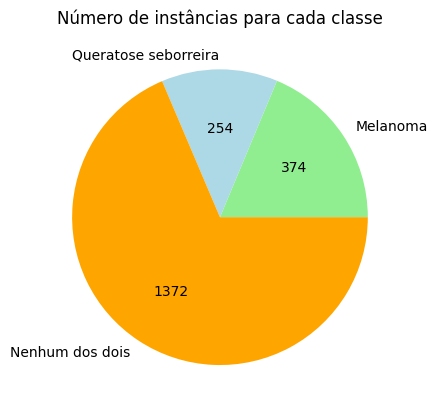

In [10]:
# Pie chart with to check if it's an unbalanced dataset

counts = np.array([(data["melanoma"].values == 1.0).sum(),
          (data["seborrheic_keratosis"].values == 1.0).sum(),
          (data["neither"].values == 1.0).sum()])

colors = ['lightgreen', 'lightblue', 'orange']

classes = "Melanoma", "Queratose seborreira", "Nenhum dos dois"

def absolute_value(val):
    a  = np.round(val/100.*counts.sum(), 0)
    return int(a)


plt.pie(counts, labels=classes, colors=colors, autopct=absolute_value)
plt.title('Número de instâncias para cada classe')
plt.savefig('../plots/class_targets_piechart.png')
plt.show()


In [11]:
data.describe()

,melanoma,seborrheic_keratosis,neither,red_mode,green_mode,blue_mode,red_median,green_median,blue_median,red_iqr,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.187000,0.127000,0.686000,192.016000,125.794000,95.357500,185.549000,126.641000,101.31300,34.798500,...,6.289506,0.191559,2.730921,0.457645,45.529248,26.478573,31500.252920,0.455713,0.003980,0.401872
std,0.390009,0.333056,0.464232,45.297358,53.106626,49.801132,36.086018,37.666265,36.64491,25.386377,...,7.383891,0.168615,0.616553,0.148122,98.615158,338.376543,174708.315813,0.814115,0.006038,1.001002
min,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,28.000000,13.000000,7.00000,2.000000,...,0.589266,0.010811,1.549012,0.115196,0.639414,0.000000,0.000949,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,173.000000,87.000000,56.000000,167.000000,102.000000,74.00000,14.000000,...,2.414319,0.075186,2.264933,0.318956,2.364749,0.970106,0.019038,0.047014,0.000424,0.056868
50%,0.000000,0.000000,1.000000,203.000000,131.000000,92.000000,191.000000,129.000000,101.50000,29.000000,...,3.609759,0.153632,2.640285,0.527967,3.206791,2.548470,0.034332,0.160129,0.001891,0.152390
75%,0.000000,0.000000,1.000000,224.000000,167.000000,131.000000,212.000000,154.000000,127.00000,51.000000,...,6.782337,0.221832,3.082851,0.558462,35.856626,6.643827,0.081341,0.520259,0.004544,0.391018
max,1.000000,1.000000,1.000000,254.000000,254.000000,254.000000,253.000000,220.000000,206.00000,160.000000,...,65.760145,0.697167,5.225605,0.750000,880.130165,12545.320139,1000000.000000,8.772503,0.056222,18.872021


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, ISIC_0000000 to ISIC_0015295
Columns: 107 entries, age_approximate to original_ngtdm_Strength
dtypes: float64(93), int64(12), object(2)
memory usage: 1.7+ MB


<AxesSubplot:xlabel='age_approximate', ylabel='Count'>

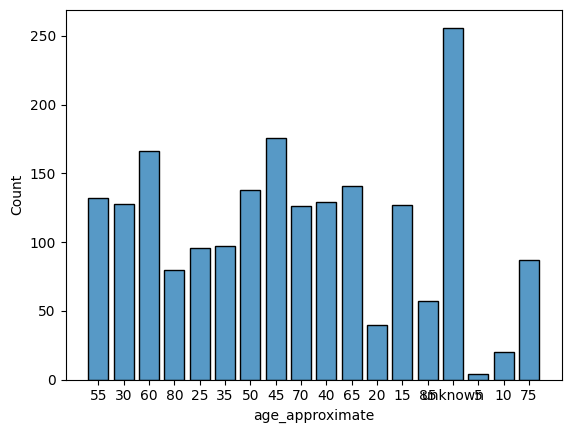

In [13]:
# Check the distribution of the patients age along the dataset
sns.histplot(x='age_approximate', data=data, shrink=0.8)

In [14]:
data.columns.to_list()

['age_approximate',
 'sex',
 'melanoma',
 'seborrheic_keratosis',
 'neither',
 'red_mode',
 'green_mode',
 'blue_mode',
 'red_median',
 'green_median',
 'blue_median',
 'red_iqr',
 'green_iqr',
 'blue_iqr',
 'original_firstorder_10Percentile',
 'original_firstorder_90Percentile',
 'original_firstorder_Energy',
 'original_firstorder_Entropy',
 'original_firstorder_InterquartileRange',
 'original_firstorder_Kurtosis',
 'original_firstorder_Maximum',
 'original_firstorder_MeanAbsoluteDeviation',
 'original_firstorder_Mean',
 'original_firstorder_Median',
 'original_firstorder_Minimum',
 'original_firstorder_Range',
 'original_firstorder_RobustMeanAbsoluteDeviation',
 'original_firstorder_RootMeanSquared',
 'original_firstorder_Skewness',
 'original_firstorder_TotalEnergy',
 'original_firstorder_Uniformity',
 'original_firstorder_Variance',
 'original_glcm_Autocorrelation',
 'original_glcm_ClusterProminence',
 'original_glcm_ClusterShade',
 'original_glcm_ClusterTendency',
 'original_glcm_

In [15]:
from sklearn.preprocessing import LabelBinarizer

In [16]:
X = data.drop(["melanoma", "seborrheic_keratosis", "neither"], axis=1)

In [17]:
# feature matrix
X = data.drop(["melanoma", "seborrheic_keratosis", "neither"], axis=1)

# targets variables
targets = data[["melanoma", "seborrheic_keratosis", "neither"]]
lb = LabelBinarizer()
y = lb.fit_transform(targets)

In [18]:
data[["melanoma", "seborrheic_keratosis", "neither"]]

,melanoma,seborrheic_keratosis,neither
image_id,,,
ISIC_0000000,0,0,1
ISIC_0000001,0,0,1
ISIC_0000002,1,0,0
ISIC_0000003,0,0,1
ISIC_0000004,1,0,0
...,...,...,...
ISIC_0015220,0,1,0
ISIC_0015233,0,1,0
ISIC_0015260,0,1,0


/tmp/ipykernel_20174/1309770129.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = plt.matshow(data.corr())


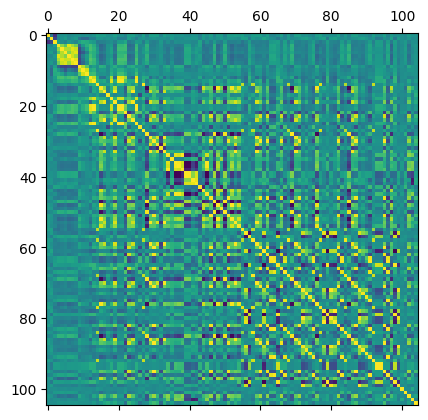

In [19]:
cor = plt.matshow(data.corr())
plt.show()

To do: Mostrar quais as features que têm maior correlação umas com as outras. Isto para elminar features redundantes.

# TO DO

- Tentar perceber a melhor forma de fazer a estatística univariada das features

- Feature selection
    - Continuar gráfico de correlações para tentar fazer uma feature selection e eliminar features redundantes

- Estudo de outliers
    - Perceber as melhores formas de procurar outliers (ainda não fiz isso)

